In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sns


# Read the CSV and Perform Basic Data Cleaning

In [13]:
df = pd.read_csv("exoplanet_data.csv")
#Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0.0,0.0,0.0,0.0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0.0,1.0,0.0,0.0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0.0,1.0,0.0,0.0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0.0,0.0,0.0,0.0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0.0,0.0,0.0,0.0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0.0,0.0,0.0,1.0,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0.0,1.0,1.0,0.0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0.0,0.0,0.0,0.0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0.0,0.0,1.0,0.0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


# Select your features (columns)

In [14]:
# Assign data to X 
# Sklearn requieres two dimensional array values
# So we use reshape to crete it
# Set features. This will also be used as your x values.
X = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration']]
X

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration
0,0.0,0.0,0.0,0.0,54.418383,162.513840,0.586,4.50700
1,0.0,1.0,0.0,0.0,19.899140,175.850252,0.969,1.78220
2,0.0,1.0,0.0,0.0,1.736952,170.307565,1.276,2.40641
3,0.0,0.0,0.0,0.0,2.525592,171.595550,0.701,1.65450
4,0.0,0.0,0.0,0.0,4.134435,172.979370,0.762,3.14020
...,...,...,...,...,...,...,...,...
6986,0.0,0.0,0.0,1.0,8.589871,132.016100,0.765,4.80600
6987,0.0,1.0,1.0,0.0,0.527699,131.705093,1.252,3.22210
6988,0.0,0.0,0.0,0.0,1.739849,133.001270,0.043,3.11400
6989,0.0,0.0,1.0,0.0,0.681402,132.181750,0.147,0.86500



# Defining the Target

In [15]:
y = df["koi_disposition"]
y

0            CONFIRMED
1       FALSE POSITIVE
2       FALSE POSITIVE
3            CONFIRMED
4            CONFIRMED
             ...      
6986    FALSE POSITIVE
6987    FALSE POSITIVE
6988         CANDIDATE
6989    FALSE POSITIVE
6990    FALSE POSITIVE
Name: koi_disposition, Length: 6991, dtype: object

# Create a Training Test Split

Use `koi_disposition` for the y values

In [16]:
# label = koi_disposition
# inputs = 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration'


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration
3563,0.0,0.0,0.0,0.0,10.548413,139.064020,1.0170,1.8720
4099,0.0,0.0,0.0,0.0,24.754385,140.207320,0.7090,3.3900
5460,0.0,0.0,0.0,0.0,1.057336,131.792007,0.2620,1.5795
1091,0.0,0.0,0.0,0.0,201.118319,187.569860,0.0010,10.3280
5999,0.0,0.0,0.0,0.0,91.649983,175.715600,0.2136,10.2940


In [17]:
y_train.head()

3563    CANDIDATE
4099    CONFIRMED
5460    CANDIDATE
1091    CONFIRMED
5999    CANDIDATE
Name: koi_disposition, dtype: object

In [18]:
# confirm the shape of features matrix and target array
print(X.shape, y.shape)

(6991, 8) (6991,)


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [19]:
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Label-encode data
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Train the Model



In [20]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train_scaled, encoded_y_train)
predictions = model.predict(X_test_scaled)
print(predictions)

print(f"Training Data Score: {model.score(X_train_scaled, encoded_y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, encoded_y_test)}")

[1 2 2 ... 2 2 1]
Training Data Score: 0.7770360480640854
Testing Data Score: 0.7877574370709383


In [21]:
# Classification report: How many errors in the model?
from sklearn.metrics import classification_report
print(classification_report(encoded_y_test, predictions, 
                            target_names = ["Confirmed", "False Positive", "Candidate"]))

                precision    recall  f1-score   support

     Confirmed       0.83      0.13      0.22       404
False Positive       0.54      0.96      0.69       435
     Candidate       0.99      1.00      0.99       909

      accuracy                           0.79      1748
     macro avg       0.79      0.70      0.64      1748
  weighted avg       0.84      0.79      0.74      1748



In [27]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(encoded_y_test, predictions)

array([[ 52, 351,   1],
       [ 10, 417,   8],
       [  1,   0, 908]], dtype=int64)

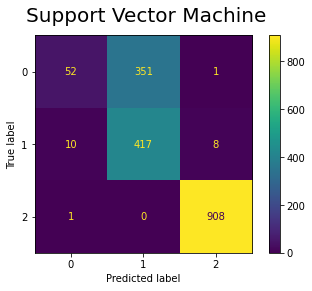

In [43]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test_scaled, encoded_y_test)
plt.suptitle('Support Vector Machine', fontsize=20)
plt.savefig('SVM.png')

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [23]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.0005, 0.001]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [24]:
# Train the model with GridSearch
grid.fit(X_train_scaled, encoded_y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.772, total=   0.3s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.779, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.783, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.773, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.773, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.772, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.779, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.783, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.773, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    5.2s finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.0005, 0.001]},
             verbose=3)

In [25]:
# Get the best parameters
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'gamma': 0.0001}
0.7806584242353678


In [44]:
best_predict = grid.predict(X_test)

In [45]:
print(classification_report(encoded_y_test, best_predict,
                           target_names = ["Confirmed", "False Positive", "Candidate"]))

                precision    recall  f1-score   support

     Confirmed       0.52      0.51      0.51       404
False Positive       0.55      0.54      0.54       435
     Candidate       0.99      1.00      0.99       909

      accuracy                           0.77      1748
     macro avg       0.68      0.68      0.68      1748
  weighted avg       0.77      0.77      0.77      1748



# Save the Model

In [46]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'SVM_model.sav'
joblib.dump(model, filename)

['SVM_model.sav']